In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Configuración visual
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("crest")

In [ ]:
df_diabetes = pd.read_csv("diabetes_data.csv")
df_hypertension = pd.read_csv("hypertension_data.csv")
df_obesity = pd.read_csv("obesity_level.csv")

In [ ]:
for name, df in [("Diabetes", df_diabetes), ("Hypertension", df_hypertension), ("Obesity", df_obesity)]:
    print(f"\n{name} → {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head(3))


Diabetes → 70692 filas, 18 columnas


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0



Hypertension → 26083 filas, 14 columnas


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1



Obesity → 20758 filas, 18 columnas


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight


In [ ]:
def describe_dataset(df):
    summary = pd.DataFrame({
        "Attribute": df.columns,
        "Type": [df[col].dtype for col in df.columns],
        "Missing %": [df[col].isnull().mean() * 100 for col in df.columns],
        "Unique Values": [df[col].nunique() for col in df.columns]
    })
    return summary

# Generar las tablas resumen
desc_diabetes = describe_dataset(df_diabetes)
desc_hypertension = describe_dataset(df_hypertension)
desc_obesity = describe_dataset(df_obesity.drop('id', axis=1))

# Mostrar
print("=== Diabetes Dataset ===")
display(desc_diabetes)
print("\n=== Hypertension Dataset ===")
display(desc_hypertension)
print("\n=== Obesity Dataset ==ungi===\n")
display(desc_obesity)

=== Diabetes Dataset ===


,Attribute,Type,Missing %,Unique Values
0,Age,float64,0.0,13
1,Sex,float64,0.0,2
2,HighChol,float64,0.0,2
3,CholCheck,float64,0.0,2
4,BMI,float64,0.0,80
5,Smoker,float64,0.0,2
6,HeartDiseaseorAttack,float64,0.0,2
7,PhysActivity,float64,0.0,2
8,Fruits,float64,0.0,2
9,Veggies,float64,0.0,2



=== Hypertension Dataset ===


,Attribute,Type,Missing %,Unique Values
0,age,float64,0.000000,88
1,sex,float64,0.095848,2
2,cp,int64,0.000000,4
3,trestbps,int64,0.000000,49
4,chol,int64,0.000000,152
5,fbs,int64,0.000000,2
6,restecg,int64,0.000000,3
7,thalach,int64,0.000000,91
8,exang,int64,0.000000,2
9,oldpeak,float64,0.000000,40



=== Obesity Dataset ===


,Attribute,Type,Missing %,Unique Values
0,id,int64,0.0,20758
1,Gender,object,0.0,2
2,Age,float64,0.0,1703
3,Height,float64,0.0,1833
4,Weight,float64,0.0,1979
5,family_history_with_overweight,int64,0.0,2
6,FAVC,int64,0.0,2
7,FCVC,float64,0.0,934
8,NCP,float64,0.0,689
9,CAEC,object,0.0,4


In [ ]:
def numeric_summary(df, name):
    print(f"\n===== {name.upper()} DATASET — GENERAL STATISTICS =====")
    summary = df.describe().T
    summary['missing_%'] = df.isnull().mean() * 100
    display(summary)
    return summary

summary_diabetes = numeric_summary(df_diabetes, "Diabetes")
summary_hypertension = numeric_summary(df_hypertension, "Hypertension")
summary_obesity = numeric_summary(df_obesity.drop('id', axis=1), "Obesity")


===== DIABETES DATASET — GENERAL STATISTICS =====


,count,mean,std,min,25%,50%,75%,max,missing_%
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0,0.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0,0.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0,0.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0,0.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0,0.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0,0.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0,0.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0,0.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0,0.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0,0.0



===== HYPERTENSION DATASET — GENERAL STATISTICS =====


,count,mean,std,min,25%,50%,75%,max,missing_%
age,26083.0,55.661389,15.189768,11.0,44.0,56.0,67.0,98.0,0.000000
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0,0.095848
cp,26083.0,0.958594,1.023931,0.0,0.0,1.0,2.0,3.0,0.000000
trestbps,26083.0,131.592992,17.588809,94.0,120.0,130.0,140.0,200.0,0.000000
chol,26083.0,246.246061,51.643522,126.0,211.0,240.0,275.0,564.0,0.000000
fbs,26083.0,0.149753,0.356836,0.0,0.0,0.0,0.0,1.0,0.000000
restecg,26083.0,0.526512,0.525641,0.0,0.0,1.0,1.0,2.0,0.000000
thalach,26083.0,149.655024,22.858109,71.0,133.0,153.0,166.0,202.0,0.000000
exang,26083.0,0.326573,0.468969,0.0,0.0,0.0,1.0,1.0,0.000000
oldpeak,26083.0,1.039512,1.165138,0.0,0.0,0.8,1.6,6.2,0.000000



===== OBESITY DATASET — GENERAL STATISTICS =====


,count,mean,std,min,25%,50%,75%,max,missing_%
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000,0.0
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000,0.0
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663,0.0
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269,0.0
family_history_with_overweight,20758.0,0.819636,0.384500,0.00,1.000000,1.000000,1.000000,1.000000,0.0
FAVC,20758.0,0.914443,0.279716,0.00,1.000000,1.000000,1.000000,1.000000,0.0
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000,0.0
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000,0.0
SMOKE,20758.0,0.011803,0.108000,0.00,0.000000,0.000000,0.000000,1.000000,0.0
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000,0.0


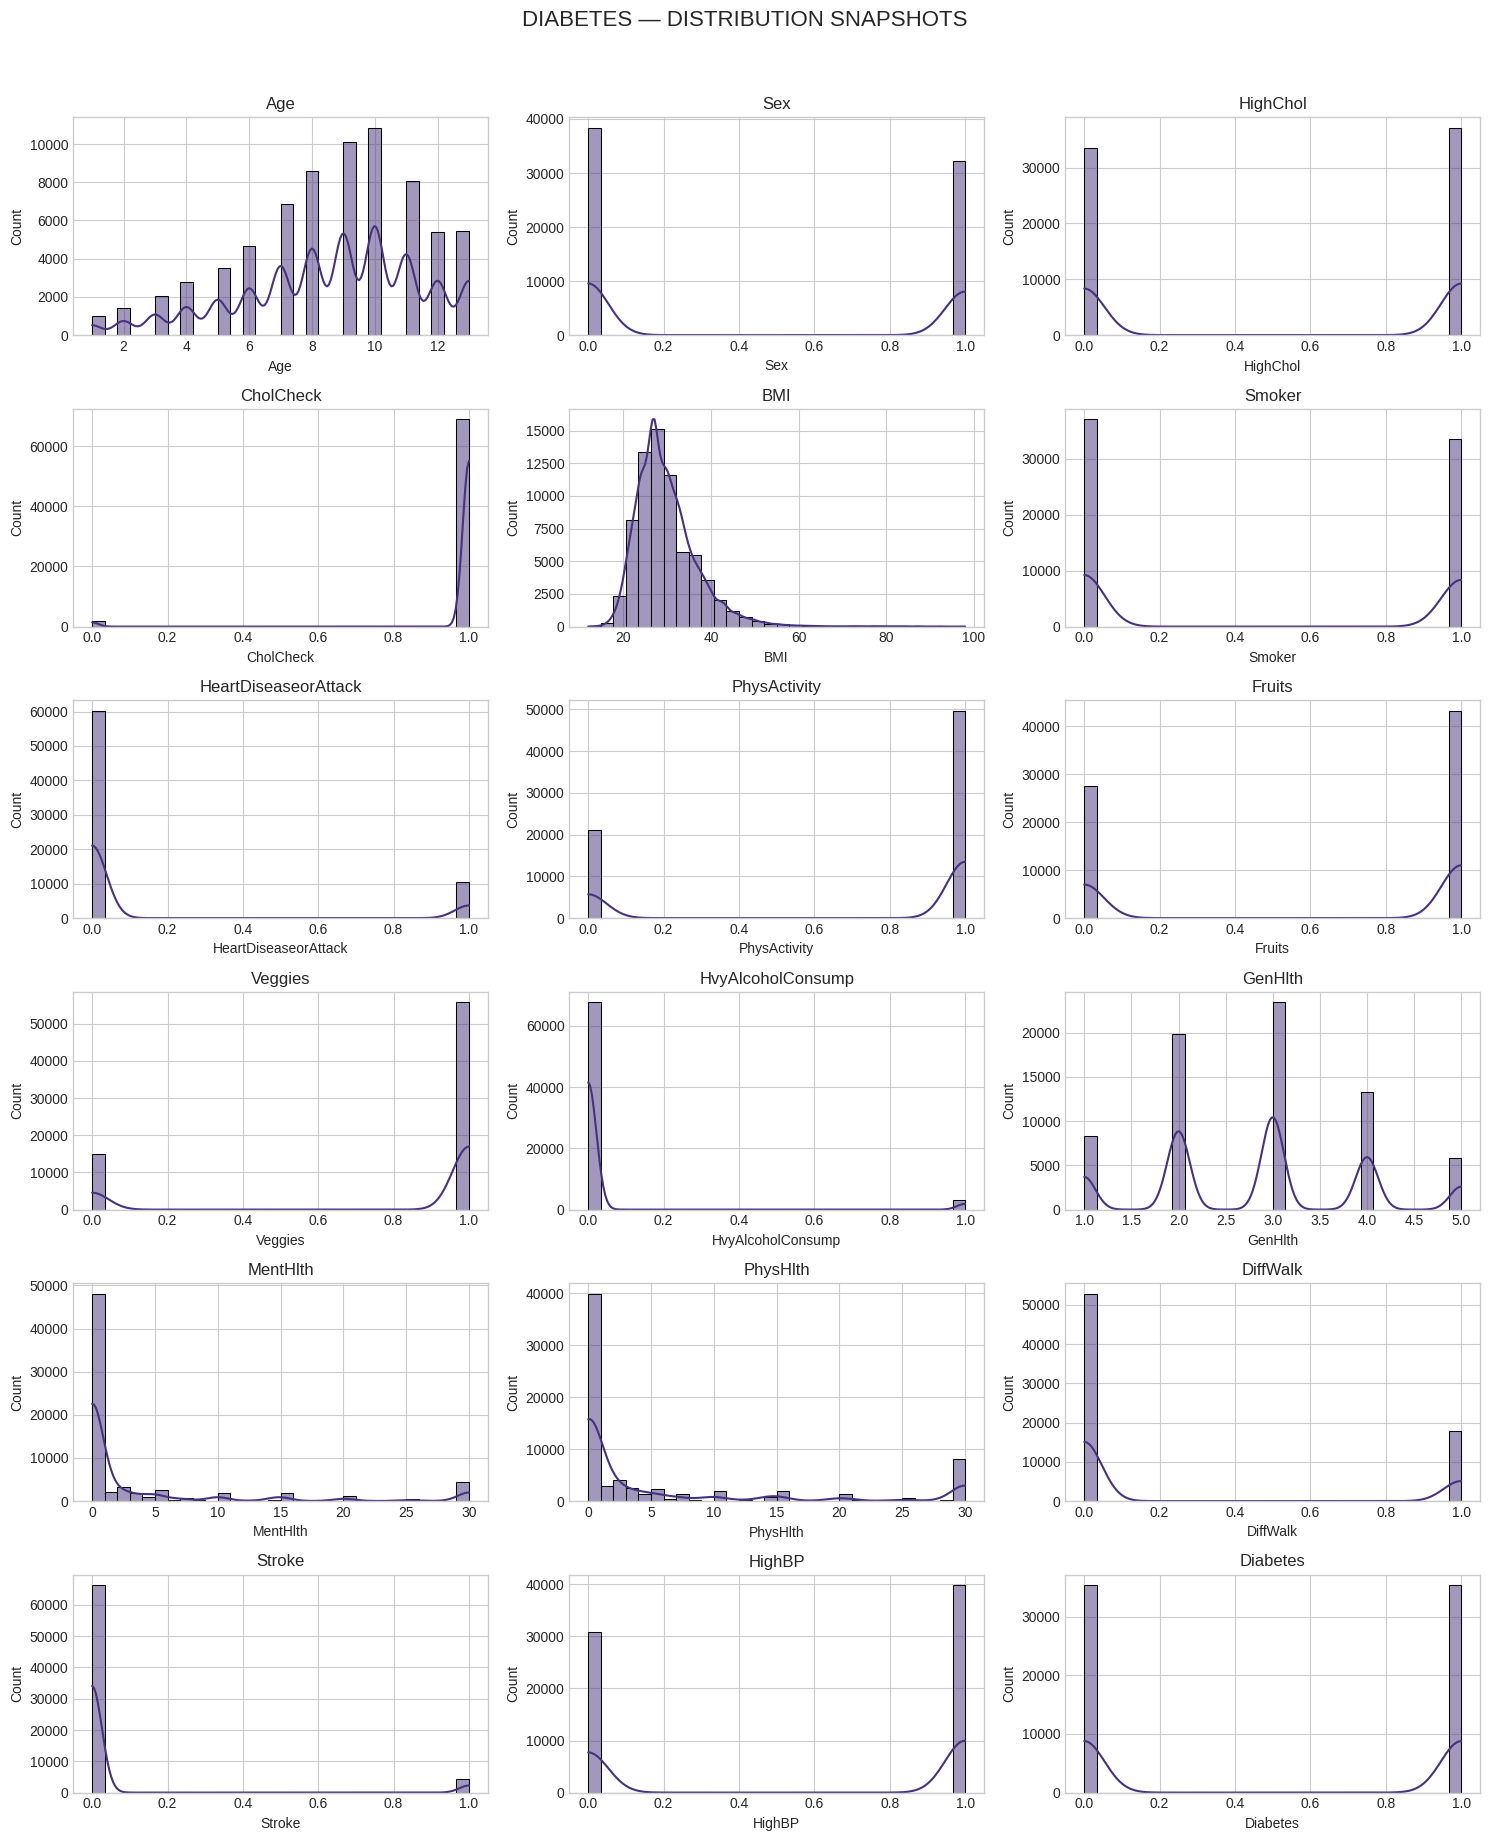

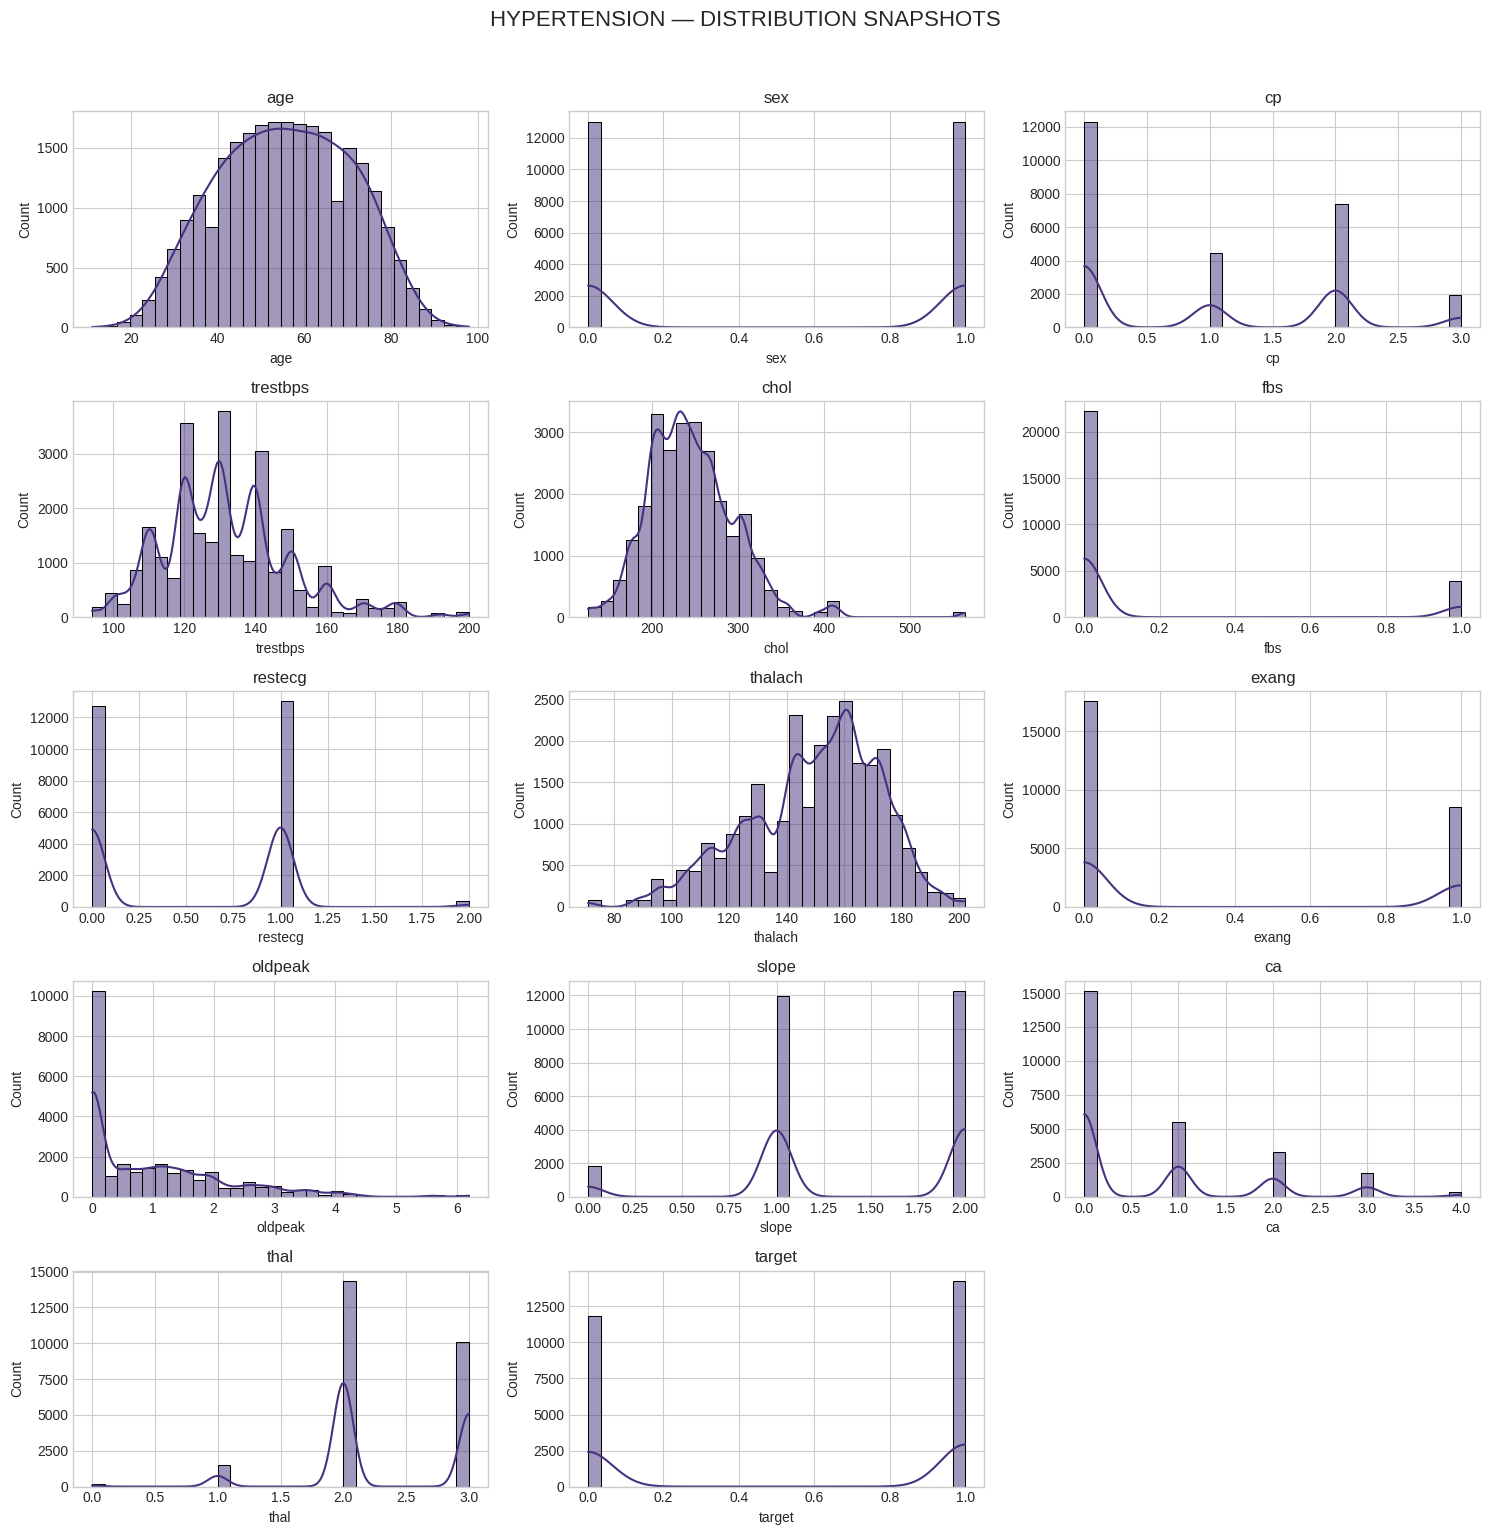

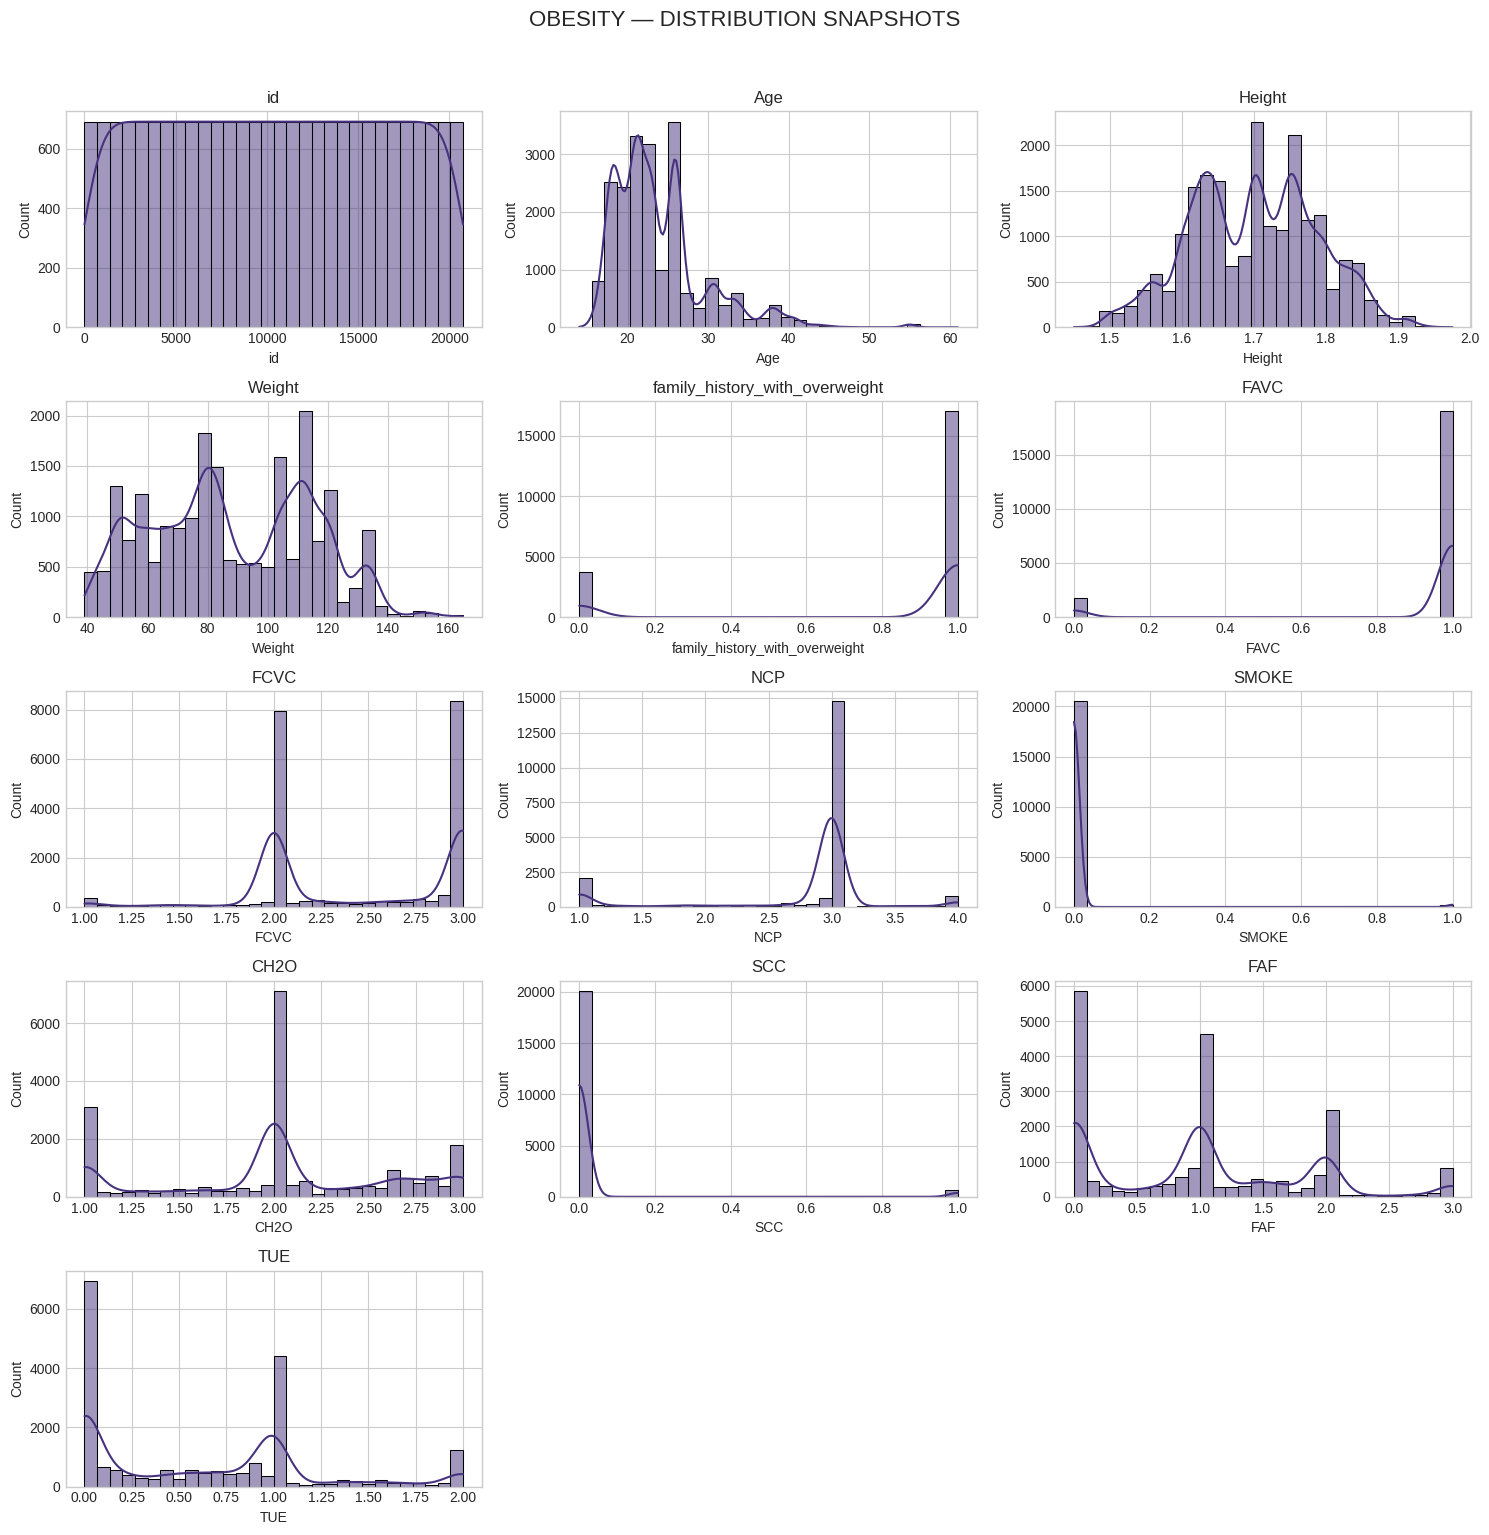

In [ ]:
def plot_distributions(df, name, n_cols=3):
    numeric_cols = df.select_dtypes(include=np.number).columns
    n_rows = int(np.ceil(len(numeric_cols) / n_cols))

    plt.figure(figsize=(15, n_rows * 3))
    plt.suptitle(f"{name.upper()} — DISTRIBUTION SNAPSHOTS", fontsize=16, y=1.02)

    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i+1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(col)

    plt.tight_layout()
    plt.show()

plot_distributions(df_diabetes, "Diabetes")
plot_distributions(df_hypertension, "Hypertension")
plot_distributions(df_obesity.drop('id', axis=1), "Obesity")

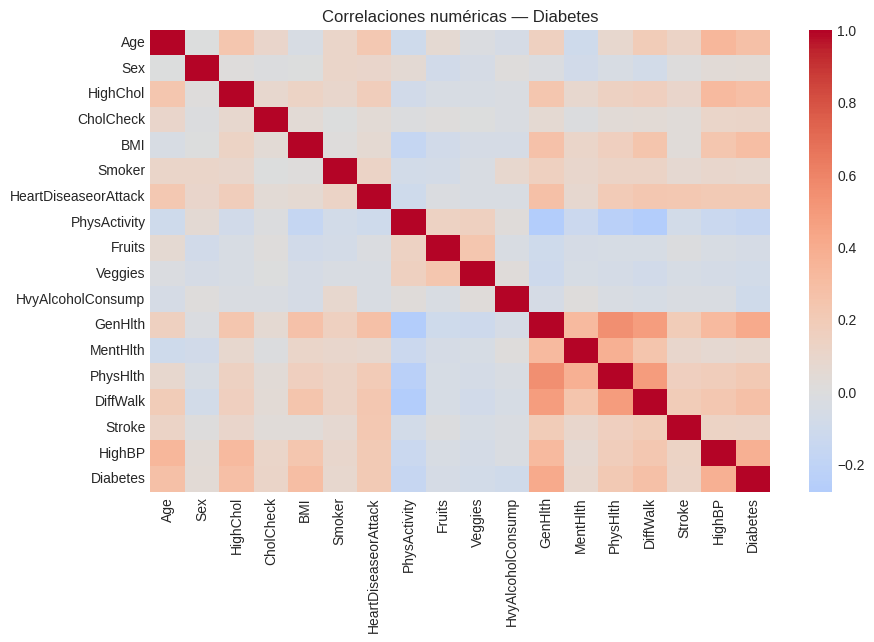

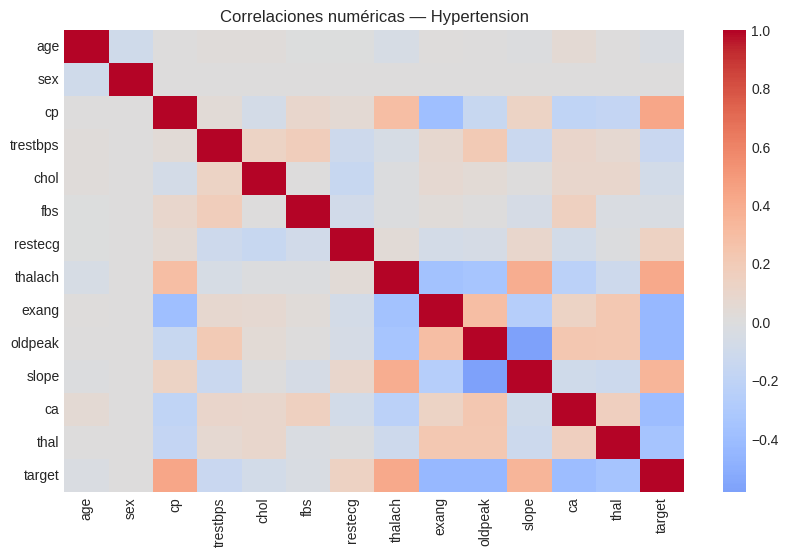

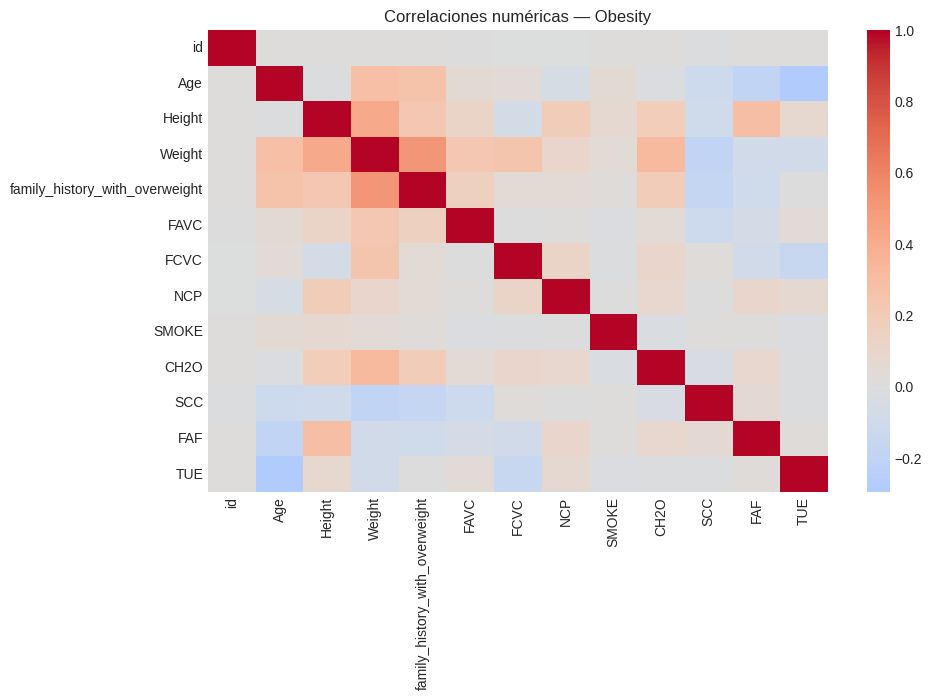

In [ ]:
def plot_correlations(df, name):
    num_cols = df.select_dtypes(include=np.number)
    corr = num_cols.corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
    plt.title(f"Correlaciones numéricas — {name}")
    plt.show()

    return corr

corr_diabetes = plot_correlations(df_diabetes, "Diabetes")
corr_hypertension = plot_correlations(df_hypertension, "Hypertension")
corr_obesity = plot_correlations(df_obesity.drop('id', axis=1).select_dtypes(include=np.number), "Obesity")

# Fuga de informacion
Otro factor que se hayo en la fase de modelado fue la fuga de informacion por parte de variables altamente relacionadas con la variable objetivo del dataset de obseidad se encontro que la variable obe1dad, al cual es la variable target de este dataset, esta variable es clasificatoria con distintos rangos segun el IMC, pero que posteriormente fue usada para decir si una persona es obesa o no, clasificandolo desde el primer nivel de obesidad se clasifica obeso, y se procede a poner como variable target,

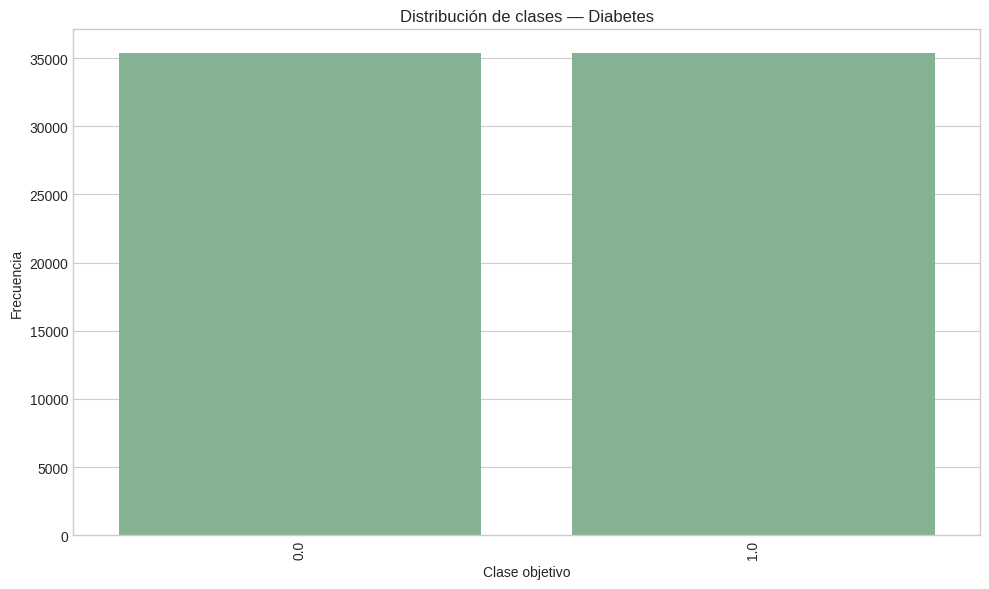

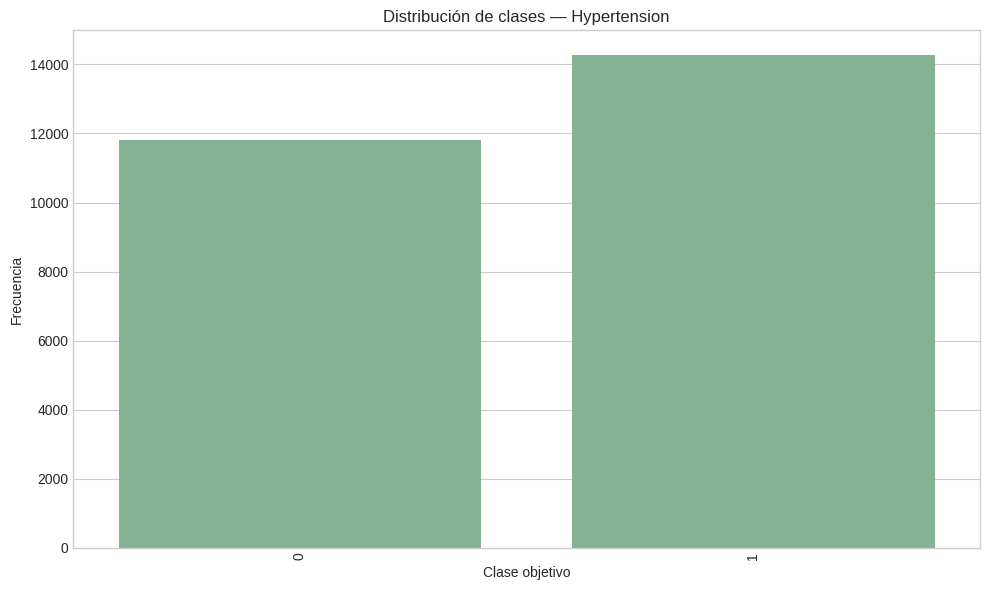

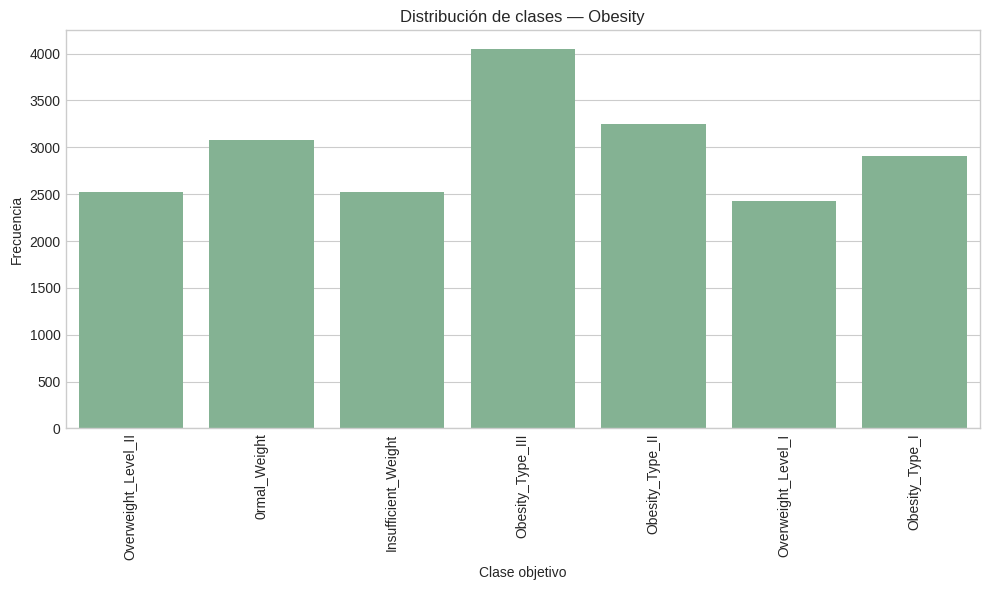

In [ ]:
def class_distribution(df, target_col, name):
    plt.figure(figsize=(10, 6)) # Aumentar el tamaño de la figura para acomodar las etiquetas rotadas
    sns.countplot(x=target_col, data=df)
    plt.title(f"Distribución de clases — {name}")
    plt.xlabel("Clase objetivo")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90)
    plt.tight_layout() # Ajustar el layout para evitar solapamientos
    plt.show()

# Diabetes e Hipertensión son binarias
class_distribution(df_diabetes, "Diabetes", "Diabetes")
class_distribution(df_hypertension, "target", "Hypertension")

# Obesidad es multiclase
class_distribution(df_obesity, "0be1dad", "Obesity")

# Desbalance
Se descubrio en etapas posteriores que el desbalanceo por mas pequeño que fuera, si afecto los resultados del modelo base haciendo que el modelo inicialmente se memorizara y no aprendiera a predecir la enfermedad de hipertension

Por lo tanto se va a aplicar SMOTE

Diabetes — Age: 0 outliers (0.00%)
Diabetes — Sex: 0 outliers (0.00%)
Diabetes — HighChol: 0 outliers (0.00%)
Diabetes — CholCheck: 1749 outliers (2.47%)
Diabetes — BMI: 2181 outliers (3.09%)
Diabetes — Smoker: 0 outliers (0.00%)
Diabetes — HeartDiseaseorAttack: 10449 outliers (14.78%)
Diabetes — PhysActivity: 0 outliers (0.00%)
Diabetes — Fruits: 0 outliers (0.00%)
Diabetes — Veggies: 14932 outliers (21.12%)
Diabetes — HvyAlcoholConsump: 3020 outliers (4.27%)
Diabetes — GenHlth: 0 outliers (0.00%)
Diabetes — MentHlth: 11816 outliers (16.71%)
Diabetes — PhysHlth: 10624 outliers (15.03%)
Diabetes — DiffWalk: 0 outliers (0.00%)
Diabetes — Stroke: 4395 outliers (6.22%)
Diabetes — HighBP: 0 outliers (0.00%)
Diabetes — Diabetes: 0 outliers (0.00%)


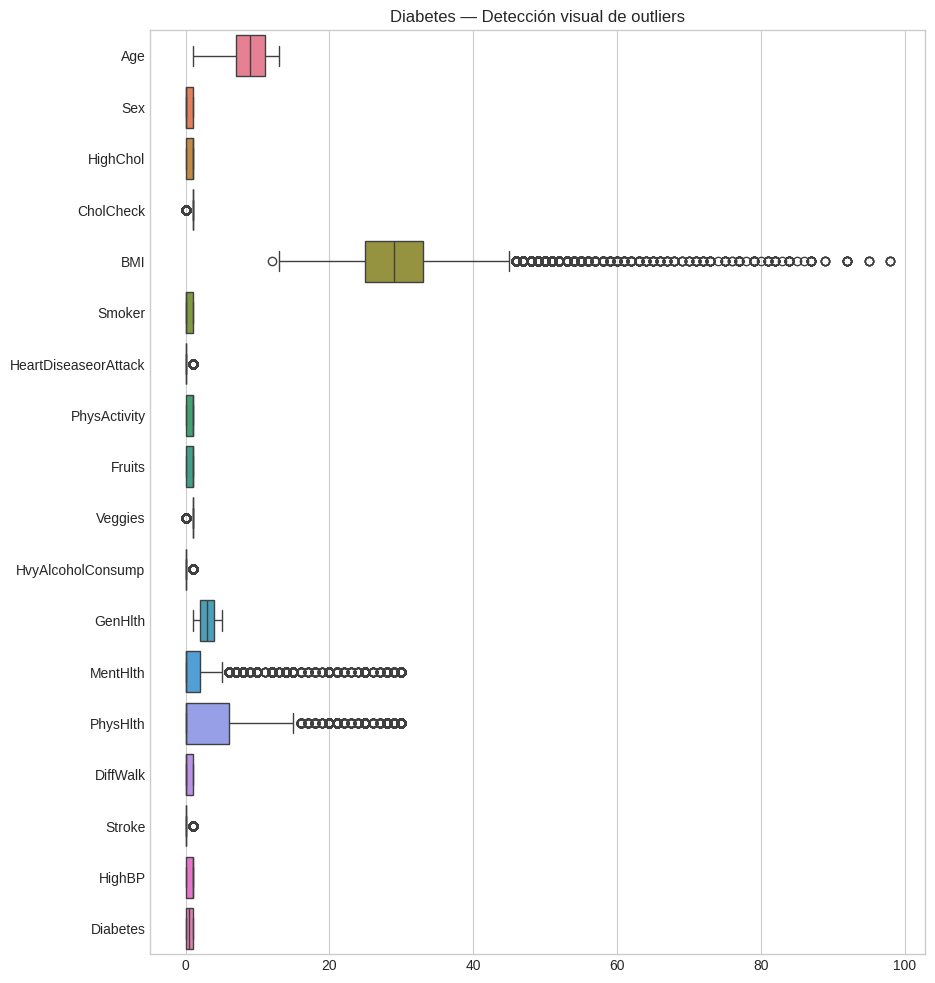

Hypertension — age: 0 outliers (0.00%)
Hypertension — sex: 0 outliers (0.00%)
Hypertension — cp: 0 outliers (0.00%)
Hypertension — trestbps: 794 outliers (3.04%)
Hypertension — chol: 424 outliers (1.63%)
Hypertension — fbs: 3906 outliers (14.98%)
Hypertension — restecg: 0 outliers (0.00%)
Hypertension — thalach: 82 outliers (0.31%)
Hypertension — exang: 0 outliers (0.00%)
Hypertension — oldpeak: 418 outliers (1.60%)
Hypertension — slope: 0 outliers (0.00%)
Hypertension — ca: 2100 outliers (8.05%)
Hypertension — thal: 154 outliers (0.59%)
Hypertension — target: 0 outliers (0.00%)


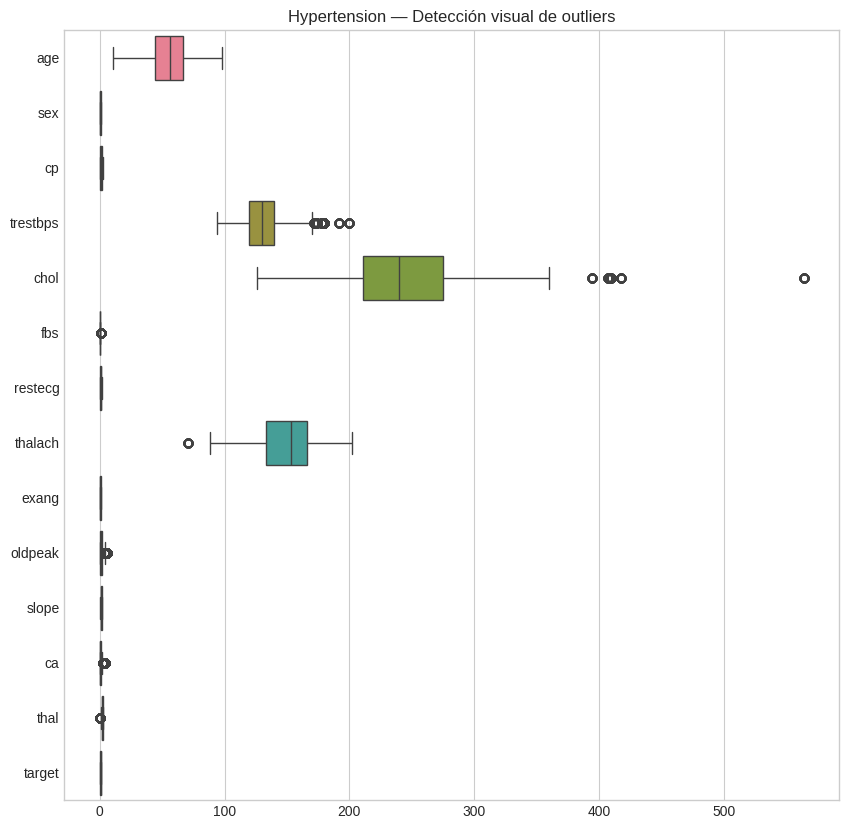

Obesity — Age: 1074 outliers (5.17%)
Obesity — Height: 4 outliers (0.02%)
Obesity — Weight: 0 outliers (0.00%)
Obesity — family_history_with_overweight: 3744 outliers (18.04%)
Obesity — FAVC: 1776 outliers (8.56%)
Obesity — FCVC: 0 outliers (0.00%)
Obesity — NCP: 6052 outliers (29.16%)
Obesity — SMOKE: 245 outliers (1.18%)
Obesity — CH2O: 0 outliers (0.00%)
Obesity — SCC: 687 outliers (3.31%)
Obesity — FAF: 0 outliers (0.00%)
Obesity — TUE: 0 outliers (0.00%)


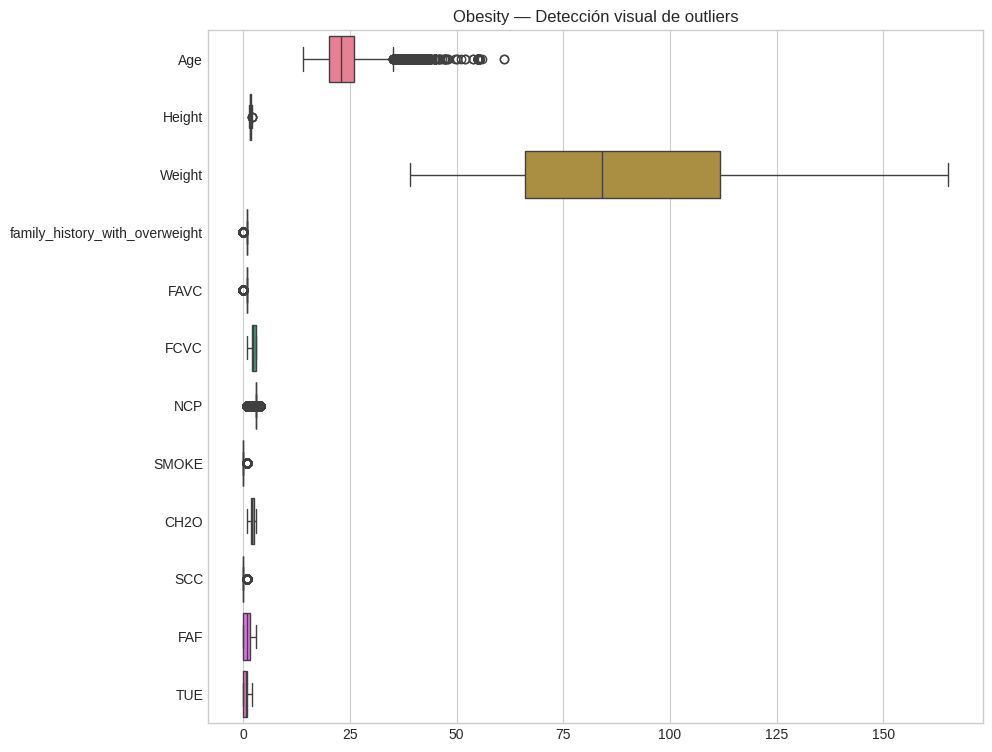

In [ ]:
def detect_outliers(df, name):
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{name} — {col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

    # Boxplot general
    plt.figure(figsize=(10, len(numeric_cols)*0.5 + 3))
    sns.boxplot(data=df[numeric_cols], orient='h')
    plt.title(f"{name} — Detección visual de outliers")
    plt.show()

detect_outliers(df_diabetes, "Diabetes")
detect_outliers(df_hypertension, "Hypertension")
detect_outliers(df_obesity.drop('id', axis=1), "Obesity")

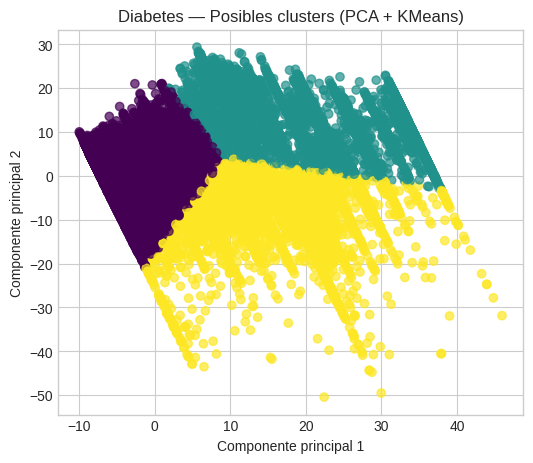

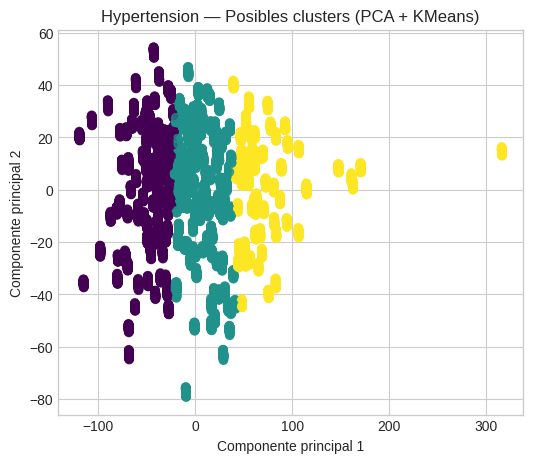

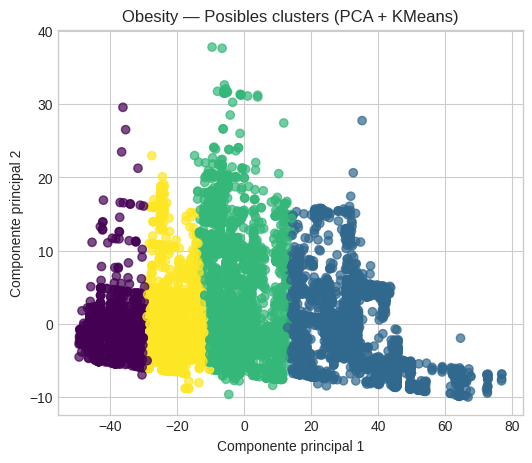

In [ ]:
def explore_clusters(df, name, n_clusters=3):
    df_num = df.select_dtypes(include=np.number).dropna()
    if df_num.shape[1] < 2:
        print(f"{name}: no hay suficientes columnas numéricas para clustering.")
        return

    # Reducción de dimensionalidad para visualización
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(df_num)

    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(reduced)

    plt.figure(figsize=(6,5))
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="viridis", alpha=0.7)
    plt.title(f"{name} — Posibles clusters (PCA + KMeans)")
    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.show()

explore_clusters(df_diabetes, "Diabetes", n_clusters=3)
explore_clusters(df_hypertension, "Hypertension", n_clusters=3)
explore_clusters(df_obesity.drop('id', axis=1), "Obesity", n_clusters=4)

In [ ]:
def check_missing_values(df, name):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_data = pd.DataFrame({
        'Variable': df.columns,
        'Missing Values': missing,
        'Missing %': missing_percent.round(3)
    }).sort_values(by='Missing %', ascending=False)

    print(f"\n=== {name.upper()} — Valores faltantes ===")
    display(missing_data[missing_data['Missing Values'] > 0])
    if missing_data['Missing Values'].sum() == 0:
        print("No se encontraron valores faltantes.")
    return missing_data

missing_diabetes = check_missing_values(df_diabetes, "Diabetes")
missing_hypertension = check_missing_values(df_hypertension, "Hypertension")
missing_obesity = check_missing_values(df_obesity, "Obesity")



=== DIABETES — Valores faltantes ===


,Variable,Missing Values,Missing %


No se encontraron valores faltantes.

=== HYPERTENSION — Valores faltantes ===


,Variable,Missing Values,Missing %
sex,sex,25,0.096



=== OBESITY — Valores faltantes ===


,Variable,Missing Values,Missing %


No se encontraron valores faltantes.


In [ ]:
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    print(f"{name} — Registros duplicados: {duplicates}")
    return duplicates

dup_diabetes = check_duplicates(df_diabetes, "Diabetes")
dup_hypertension = check_duplicates(df_hypertension, "Hypertension")
dup_obesity = check_duplicates(df_obesity, "Obesity")


Diabetes — Registros duplicados: 6672
Hypertension — Registros duplicados: 0
Obesity — Registros duplicados: 0


In [ ]:
def check_inconsistencies(df, name):
    print(f"\n=== {name.upper()} — Inconsistencias ===")
    inconsistencias = {}
    for col in df.select_dtypes(include=np.number).columns:
        neg = (df[col] < 0).sum()
        high = (df[col] > df[col].quantile(0.99)).sum()  # valores extremos
        if neg > 0 or high > 0:
            inconsistencias[col] = {"Negativos": neg, "Extremos (>P99)": high}
    if inconsistencias:
        display(pd.DataFrame(inconsistencias).T)
    else:
        print("No se detectaron valores anómalos significativos.")
    return inconsistencias

inc_diabetes = check_inconsistencies(df_diabetes, "Diabetes")
inc_hypertension = check_inconsistencies(df_hypertension, "Hypertension")
inc_obesity = check_inconsistencies(df_obesity, "Obesity")



=== DIABETES — Inconsistencias ===


,Negativos,Extremos (>P99)
BMI,0,690



=== HYPERTENSION — Inconsistencias ===


,Negativos,Extremos (>P99)
age,0,242
trestbps,0,178
chol,0,248
thalach,0,192
oldpeak,0,258



=== OBESITY — Inconsistencias ===


,Negativos,Extremos (>P99)
id,0,208
Age,0,202
Height,0,206
Weight,0,208


In [ ]:
summary_quality = pd.DataFrame({
    "Dataset": ["Diabetes", "Hypertension", "Obesity"],
    "Missing (%)": [
        missing_diabetes["Missing %"].sum(),
        missing_hypertension["Missing %"].sum(),
        missing_obesity["Missing %"].sum()
    ],
    "Duplicados": [dup_diabetes, dup_hypertension, dup_obesity],
    "Inconsistencias detectadas": [
        len(inc_diabetes),
        len(inc_hypertension),
        len(inc_obesity)
    ]
})
display(summary_quality)


,Dataset,Missing (%),Duplicados,Inconsistencias detectadas
0,Diabetes,0.000,6672,1
1,Hypertension,0.096,0,5
2,Obesity,0.000,0,4
